In [17]:
from keras.datasets import imdb
import numpy as np

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 18s 1us/step


In [120]:
len(train_data[0])

218

In [98]:
max([max(train_data[i]) for i in range(len(train_data))])

9999

In [50]:
[reverse_word_index[i] for i in train_data[0]]

['the',
 'as',
 'you',
 'with',
 'out',
 'themselves',
 'powerful',
 'lets',
 'loves',
 'their',
 'becomes',
 'reaching',
 'had',
 'journalist',
 'of',
 'lot',
 'from',
 'anyone',
 'to',
 'have',
 'after',
 'out',
 'atmosphere',
 'never',
 'more',
 'room',
 'and',
 'it',
 'so',
 'heart',
 'shows',
 'to',
 'years',
 'of',
 'every',
 'never',
 'going',
 'and',
 'help',
 'moments',
 'or',
 'of',
 'every',
 'chest',
 'visual',
 'movie',
 'except',
 'her',
 'was',
 'several',
 'of',
 'enough',
 'more',
 'with',
 'is',
 'now',
 'current',
 'film',
 'as',
 'you',
 'of',
 'mine',
 'potentially',
 'unfortunately',
 'of',
 'you',
 'than',
 'him',
 'that',
 'with',
 'out',
 'themselves',
 'her',
 'get',
 'for',
 'was',
 'camp',
 'of',
 'you',
 'movie',
 'sometimes',
 'movie',
 'that',
 'with',
 'scary',
 'but',
 'and',
 'to',
 'story',
 'wonderful',
 'that',
 'in',
 'seeing',
 'in',
 'character',
 'to',
 'of',
 '70s',
 'musicians',
 'with',
 'heart',
 'had',
 'shadows',
 'they',
 'of',
 'here',
 

In [22]:
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 8s 5us/step


In [61]:
reverse_word_index[22]

'you'

In [33]:
reverse_word_index = dict([(value, key) for (key,value) in word_index.items()])

In [36]:
(reverse_word_index)

{1: 'the',
 2: 'and',
 3: 'a',
 4: 'of',
 5: 'to',
 6: 'is',
 7: 'br',
 8: 'in',
 9: 'it',
 10: 'i',
 11: 'this',
 12: 'that',
 13: 'was',
 14: 'as',
 15: 'for',
 16: 'with',
 17: 'movie',
 18: 'but',
 19: 'film',
 20: 'on',
 21: 'not',
 22: 'you',
 23: 'are',
 24: 'his',
 25: 'have',
 26: 'he',
 27: 'be',
 28: 'one',
 29: 'all',
 30: 'at',
 31: 'by',
 32: 'an',
 33: 'they',
 34: 'who',
 35: 'so',
 36: 'from',
 37: 'like',
 38: 'her',
 39: 'or',
 40: 'just',
 41: 'about',
 42: "it's",
 43: 'out',
 44: 'has',
 45: 'if',
 46: 'some',
 47: 'there',
 48: 'what',
 49: 'good',
 50: 'more',
 51: 'when',
 52: 'very',
 53: 'up',
 54: 'no',
 55: 'time',
 56: 'she',
 57: 'even',
 58: 'my',
 59: 'would',
 60: 'which',
 61: 'only',
 62: 'story',
 63: 'really',
 64: 'see',
 65: 'their',
 66: 'had',
 67: 'can',
 68: 'were',
 69: 'me',
 70: 'well',
 71: 'than',
 72: 'we',
 73: 'much',
 74: 'been',
 75: 'bad',
 76: 'get',
 77: 'will',
 78: 'do',
 79: 'also',
 80: 'into',
 81: 'people',
 82: 'other',
 8

In [83]:
decoded_review = ' '.join(
[reverse_word_index.get(i-3, '?') for i in train_data[10]])

In [105]:
decoded_review

"? french horror cinema has seen something of a revival over the last couple of years with great films such as inside and ? romance ? on to the scene ? ? the revival just slightly but stands head and shoulders over most modern horror titles and is surely one of the best french horror films ever made ? was obviously shot on a low budget but this is made up for in far more ways than one by the originality of the film and this in turn is ? by the excellent writing and acting that ensure the film is a winner the plot focuses on two main ideas prison and black magic the central character is a man named ? sent to prison for fraud he is put in a cell with three others the quietly insane ? body building ? marcus and his retarded boyfriend daisy after a short while in the cell together they stumble upon a hiding place in the wall that contains an old ? after ? part of it they soon realise its magical powers and realise they may be able to use it to break through the prison walls br br black mag

In [106]:
def vectorize_sequences(sequences, dimensions = 10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results   

In [108]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [130]:
x_train[0][:10]


array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1.])

In [129]:
len(train_data)

25000

In [145]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [146]:
from keras import models
from keras import layers

In [147]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [152]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [153]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [156]:
model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [158]:
history = model.fit(x = partial_x_train, y = partial_y_train, batch_size = 512, epochs=20, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 128us/step - loss: 0.0030 - acc: 0.9999 - val_loss: 0.7364 - val_acc: 0.8635
Epoch 2/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.0066 - acc: 0.9983 - val_loss: 0.7569 - val_acc: 0.8648
Epoch 3/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.0019 - acc: 0.9999 - val_loss: 0.7835 - val_acc: 0.8642
Epoch 4/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.0051 - acc: 0.9985 - val_loss: 0.8213 - val_acc: 0.8627
Epoch 5/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.0012 - acc: 0.9999 - val_loss: 0.8419 - val_acc: 0.8613
Epoch 6/20
15000/15000 [==============================] - 2s 128us/step - loss: 0.0039 - acc: 0.9993 - val_loss: 0.8831 - val_acc: 0.8611
Epoch 7/20
15000/15000 [==============================] - 2s 124us/step - loss: 7.8314e-04 - acc: 0.9999 - val_loss: 0.886

In [159]:
history_dict = history.history

In [160]:
history_dict.keys()

dict_keys(['acc', 'val_loss', 'val_acc', 'loss'])

In [161]:
import matplotlib.pyplot as plt

In [183]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
val_acc = history_dict['val_acc']
epochs = range(1, len(history_dict['acc'])+1)

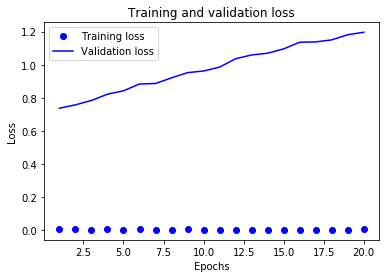

In [184]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

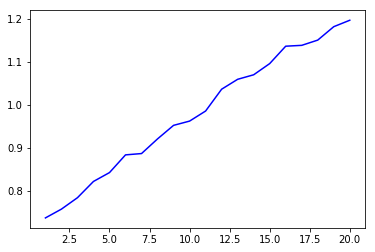

In [185]:
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

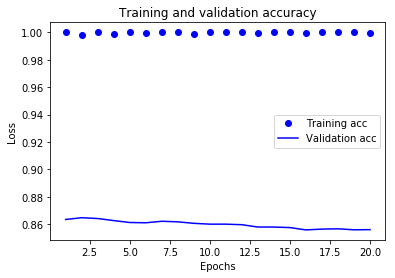

In [186]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [187]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 71us/step


[1.3271342745995522, 0.84092]

In [188]:
model.predict(x_test)

array([[4.6656305e-06],
       [1.0000000e+00],
       [9.9901485e-01],
       ...,
       [5.6513076e-05],
       [8.6105935e-04],
       [9.2472869e-01]], dtype=float32)

In [189]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 106us/step - loss: 0.4641 - acc: 0.8180
Epoch 2/4
25000/25000 [==============================] - 2s 82us/step - loss: 0.2663 - acc: 0.9060
Epoch 3/4
25000/25000 [==============================] - 2s 82us/step - loss: 0.2045 - acc: 0.9277
Epoch 4/4
25000/25000 [==============================] - 2s 60us/step


In [190]:
results

[0.2900405318212509, 0.88496]

In [192]:
model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 2s 83us/step - loss: 0.0832 - acc: 0.9732
Epoch 2/4
25000/25000 [==============================] - 2s 81us/step - loss: 0.0755 - acc: 0.9757
Epoch 3/4
25000/25000 [==============================] - 2s 81us/step - loss: 0.0633 - acc: 0.9800
Epoch 4/4
25000/25000 [==============================] - 2s 81us/step - loss: 0.0561 - acc: 0.9829
